#Exploring Randomized Response: Privacy, Epsilon, and Differential Privacy in Survey Data

In class, we discussed an example of randomized response. We introduced a 'coin-flipping' method for introducing noise to responses of the question "Have you ever cheated on an exam?" To answer this question, respondents would use the following procedure:

1. Flip a coin **C1**
  1. if C1 is heads, then **respond truthfully**
  2. if C1 is tails, then flip another coin **C2**
    1. if C2 is heads then respond **No**
    2. if C2 is tails then respond **Yes**

This algorithm is an example of localized random response (i.e., noise is added when the data is collected).

In this notebook, you will work through this 'coin-flipping' method. Then you will modify our randomized response algorithm to see how this affects privacy guarantees.


## Setup

Import necessary packages.

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt

## Randomized response algorithm 1

<img src="https://drive.google.com/uc?export=view&id=1NEP2dOjcIImisdEaGgRDg08lSlXtDYj1" width="700">

Below we define a function for our 'coin-flipping' randomized response algorithm. This algorithm is depicted by the figure above. We set `truth='Yes'` as our default argument but it would also work with `Truth='No'`. Read through the code to make sure you understand how it works.



In [ ]:
import random

def randomized_algorithm1(truth='Yes'):

  C1 = random.choice(['Heads', 'Tails'])

  if (C1 == 'Heads'):
    response = truth
  else:
    C2 = random.choice(['Heads', 'Tails'])
    if (C2 == 'Tails'):
      response = 'Yes'
    else:
      response = 'No'

  return response

Try running the algorithm (below) a few times. Double-check that you sometimes get "Yes" and sometimes get "No" responses.


In [ ]:
randomized_algorithm1()

'Yes'

### Calculating epsilon, the privacy parameter

The randomized algorithm defined above provides a certain degree of privacy which we call epsilon. Below we will cover how to calculate epsilon.

#### Probability of "Yes" for a person whose true value is "Yes"

Let's start by taking the case where a person's true value is "Yes", i.e. `truth = 'Yes'`. How could that person end up answering "Yes" in the randomized algorithm above?

> 1. They could flip C1 and get heads, in which case they would answer with the truth, i.e. "Yes." Or;
> 2. They could flip C1 and get tails; then flip C2 and get tails again, in which case they would answer "Yes."

Calculate the probability of a person answering "Yes" given that the truth is "Yes":

In [ ]:
P_C1_heads = 0.5
P_C1_tails = 0.5
P_C2_tails = 0.5

P_yes_given_yes = P_C1_heads + (P_C1_tails * P_C2_tails)
print(P_yes_given_yes)

0.75


#### Probability of "Yes" for a person whose true value is "No"

Now let's take the case where a person's true value is "No," i.e. `truth = 'No'`. How could that person end up answering 'Yes' based on the 'coin-flipping' randomized algorithm?

1. They could flip C1 and it returns tails; then flip C2 and get tails again, in which case they would answer "Yes."

Calculate the probability of a person answering "Yes" given that the truth is "No":

In [ ]:
P_yes_given_no = P_C1_tails * P_C2_tails
print(P_yes_given_no)

0.25


#### Calculate epsilon for the first algorithm

Epsilon is calculated by taking the probability that a person answered "Yes" because the truth for that person was "Yes" and dividing it by the probability that a person answered "Yes" even though the truth was "No."

This captures the idea of **plausible deniability** which is foundational to differential privacy. A person could have answered "Yes" because they truthfully did cheat on an exam or they could have answered "Yes" because they flipped a certain coin combination. We can't know which route led the person to answering "Yes" by looking only at their response.

In [ ]:
epsilon = np.log(P_yes_given_yes / P_yes_given_no)
print("epsilon:", epsilon)

epsilon: 1.0986122886681098


Note that we take the natural log.

## Randomized response algorithm 2

<img src="https://drive.google.com/uc?export=view&id=1ELyGARwJnXtVtj9jLub11rJj6N_ejjnC" width="700">

Let's modify the 'coin-flipping' algorithm by introducing a third coin, **C3**. We'll define a new algorithm called `randomized_algorithm2` based on the above figure. Spend some time reviewing the below function so that you understand it.

In [ ]:
def randomized_algorithm2(truth='Yes'):

  C1 = random.choice(['Heads', 'Tails'])

  if (C1 == 'Heads'):
    response = truth
  else:
    C2 = random.choice(['Heads', 'Tails'])
    if (C2 == 'Heads'):
      response = 'No'
    else:
      C3 = random.choice(['Heads', 'Tails'])
      if (C3 == 'Heads'):
        response = 'No'
      else:
        response = 'Yes'

  return response

Try running the new algorithm (below) a few times. Double-check that you sometimes get "Yes" and sometimes get "No" responses.

In [ ]:
randomized_algorithm2()

'No'

### Calculate epsilon for algorithm 2

Think through the ways that a person whose true value is "Yes" could respond with "Yes" in the second algorithm. These are:

> 1. They could flip C1 and get heads in which case they would answer with the truth, i.e. "Yes." Or;
> 2. They could flip C1 and get tails; then flip C2 and get tails; then flip C3 and get tails for a third time in a row, in which case they would answer "Yes."

Again, calculate the probability of a person answering "Yes" given that the truth is "Yes":

In [ ]:
P_C3_tails = 0.5

P_yes_given_yes2 = P_C1_heads + (P_C1_tails * P_C2_tails * P_C3_tails)
print(P_yes_given_yes2)

0.625


The probability of a person answering "Yes" given that the truth is "No" is also different in our second algorithm. The route to this answer is:

> 1. C1 tails; followed by C2 tails, followed by C3 tails



In [ ]:
P_yes_given_no2 = P_C1_tails * P_C2_tails * P_C3_tails
print(P_yes_given_no2)

0.125


And now we can calculate epsilon for our second algorithm:

In [ ]:
epsilon2 = np.log(P_yes_given_yes2 / P_yes_given_no2)
print("epsilon:", epsilon2)

epsilon: 1.6094379124341003


Recall that epsilon represents the strength of privacy from the algorithm, where a **lower value indicates stronger privacy**. Why is `epsilon2` for the second algorithm higher than `epsilon` from the first algorithm?

**Write your answer here and include your reasoning:**

## Randomized response algorithm 3

<img src="https://drive.google.com/uc?export=view&id=1OFjubxvcx3s73NzoIMMD4tsrfCzIi6AM" width="700">

In the third and final randomized response algorithm, keep three coins but change the algorithm according to the figure above. Note that in the third algorithm, we will flip a coin after C1 no matter what. We'll either flip C2 or C3 depending on C1. That means that every respondent will be guaranteed to flip two coins.

The third algorithm is defined as follows:

In [ ]:
def randomized_algorithm3(truth='Yes'):

  C1 = random.choice(['Heads', 'Tails'])

  if (C1 == 'Heads'):
    C2 = random.choice(['Heads', 'Tails'])
    if (C2 == 'Tails'):
      response = 'Yes'
    else:
      response = 'No'
  else:
    C3 = random.choice(['Heads', 'Tails'])
    if (C3 == 'Tails'):
      response = truth
    else:
      response = 'No'

  return response

Again, check that it works as anticipated:

In [ ]:
randomized_algorithm3()

'No'

### Calculate epsilon for algorithm 3

Repeat the exercise from our first and second algorithm. What is the probability that a person will respond "Yes" given that the truth for that person is "Yes"?

**Write down the route(s) here:**

Calculate the probability of `yes_given_yes` (i.e. the probability that a person responds yes and the truth is yes):

In [ ]:
P_C1_heads = 0.5
P_C2_tails = 0.5

P_yes_given_yes3 = (P_C1_heads * P_C2_tails) + (P_C1_tails * P_C3_tails)
print(P_yes_given_yes3)

0.5


What is the probability that a person will respond "Yes" given that the truth for that person is "No"?

Calculate the probability of `yes_given_no` (i.e. the probability that a person responds yes even though the truth is no):

In [ ]:
P_C1_heads = 0.5
P_C2_tails = 0.5

yes_given_no3 = (P_C1_heads * P_C2_tails)
print(yes_given_no3)

0.25


Calculate epsilon by using the values `yes_given_yes` and `yes_given_no`:

In [ ]:
epsilon3 = np.log(P_yes_given_yes3 / yes_given_no3)
print("epsilon:", epsilon3)

epsilon: 0.6931471805599453


What do you observe about epsilon for the third algorithm?

**Write your answer here:**
The epsilon for algorithm 3 is lower than number 1 and 2 at .693. This means that algorithm 3 was able to offer stronger privacy making it harder to guess the correct response. Overall algorithm 3 introduced more randomness compared to the other to algorithms offering the most privacy but less accurate results.

## Example with data

In the first randomized algorithm (called `randomized_algorithm1`), we can estimate the proportion of responses for whom we expect the truth to be "Yes" by the formula:

> $\hat{p} = 2y - 0.5$

where $\hat{p}$ is the estimated proportion of respondents for whom Truth = Yes and $y$ is the proportion of respondents who say "Yes".

Suppose 100 students are asked to respond to our question "Have you ever cheated on an exam?". Also suppose that the truth is "Yes" for 30 of those students and "No" for the other 70. If we ask each student to respond via our first randomized algorithm, we would estimate the proportion of true "Yes" responses from our 100 students to be:

In [ ]:
results = [randomized_algorithm1(truth=P) for P in ['Yes']*30 + ['No']*70]

(2 *(results.count('Yes') / 100) - 0.5)

0.36

## Simulate the proportion of 'Yes' responses

The above is just a one-shot example. The estimate, $\hat{p}$, will vary each time we run the above cell because there's randomization involved.

Let's simulate the distribution of estimates for a population of 100 students responding using the randomization algorithm over and over again. We'll simulate the randomized response 10,000 times and estimate the proportion of "Yes" responses each time.

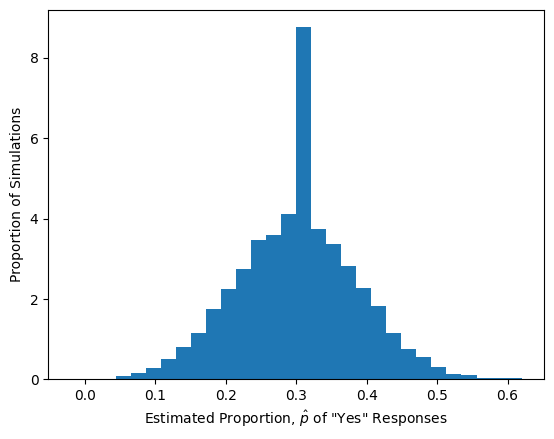

In [ ]:
output = []*10000
for x in range(0, 10000):
  results = [randomized_algorithm1(truth=P) for P in ['Yes']*30 + ['No']*70]
  output.append(2 * (results.count('Yes') / 100) - 0.5)

plt.hist(output, density=True, bins=30)  # density=False would make counts
plt.ylabel('Proportion of Simulations')
plt.xlabel('Estimated Proportion, $\hat{p}$ of "Yes" Responses');


What do you observe from this distribution?

**Write your answer here:**
Over 10000 iterations, the distribution has developed a bell-shaped curve with the center to be around .3 or 30% of responses. There is a sharp peak around .25-.45, making up a significant proportion of simulations, indicating that a number around this area is the true percent that cheated. These results are representative of the true frequency however, the noise introduced has made the results somewhat reliable but not a perfect representation.

## Create your own randomized response algorithm

Come up with your own randomized response algorithm, write a function for it, calculate epsilon, and see how it works in practice. You can use the above examples as a template.

**Describe your randomized response algorithm here:**

In [ ]:
def randomized_algorithm4(truth='Yes'):

  C1 = random.choice(['Heads', 'Tails'])

  if (C1 == 'Heads'):
    C2 = random.choice(['Heads', 'Tails'])
    if (C2 == 'Tails'):
      response = 'Yes'
    else:
      response = 'No'
  else:
    C3 = random.choice(['Heads', 'Tails'])
    if (C3 == 'Tails'):
      response = truth
    else:
      C4 = random.choice(['Heads', 'Tails'])
      if (C4 == 'Tails'):
        response = truth
      else:
        response = 'No'

  return response

Try running your algorithm a few times to make sure you get both "Yes" and "No" responses.

In [ ]:
randomized_algorithm4()

'No'

### Calculate epsilon for your algorithm

What are that routes to a person responding "Yes" given that the truth for that person is "Yes"?

**Write the route(s) here:**

What is the probability that a person will respond "Yes" given that the truth for that person is "Yes"?

In [ ]:
P_C1_heads = 0.5
P_C2_tails = 0.5
P_C3_tails = 0.5
P_C3_heads = 0.5
P_C4_tails = 0.5

P_yes_given_yes4 = (P_C1_heads * P_C2_tails) + (P_C1_tails * P_C3_tails) + (P_C1_tails * P_C3_heads * P_C4_tails)
print(P_yes_given_yes4)

0.625


What are the route(s) to a "Yes" given the truth is "No"?

**Write the route(s) here:**

What is the probability that a person will respond "Yes" given that the truth for that person is "No"?

In [ ]:
P_C1_heads = 0.5
P_C2_tails = 0.5

yes_given_no4 = (P_C1_heads * P_C2_tails)
print(yes_given_no4)

0.25


Now calculate epsilon for your algorithm.

In [ ]:
epsilon4 = np.log(P_yes_given_yes4 / yes_given_no4)
print("epsilon:", epsilon4)

epsilon: 0.9162907318741551


### Comparing algorithms

Compare the four algorithms (your algorithm + algorithm 1, 2, and 3 from this assignmnet) by ranking them from most private to least private. Which algorithm provides the most privacy? What does this mean in terms of the accuracy of the estimate, $\hat{p}$ when using each of the algorithms?

**Write your answer here:**
As a lower epsilon means greater privacy the algorithms would rank 2, 1, 4, 3 in order of weakest to strongest privacy. In terms of the accuracy, it would be the inverse order with 3 being the least accurate and 2 being the most accurate due to the inverse relationship between accuracy and privacy. Overall, 2 is the most accurate, 3 is the most private and 1 / 4 are balanced in the middle.